In [3]:
%pylab inline

from lib.KDTreeEncoding import *

import xgboost as xgb
from lib.XGBHelper import *
from lib.XGBoost_params import *
from lib.score_analysis import *

from lib.logger import logger

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from numpy import load
from glob import glob
import pandas as pd
import pickle as pkl

Populating the interactive namespace from numpy and matplotlib


In [4]:
# set path to directories here
poverty_dir = '/datasets/cs255-sp22-a00-public/poverty/'
image_dir = poverty_dir + '/anon_images'
train_table = '../public_tables/train.csv'

In [5]:
# creating main dataframe and image files here
df=pd.read_csv(train_table,index_col=0)
df.index = df['filename']
files=list(glob(f'{image_dir}/*.npz'))

In [6]:
## Getting features from the images in the main dataframe Enc_data using KD-trees
## Can think of changes here to extract features from the images in a different manner
train_size,tree=train_encoder(files,max_images=600,tree_depth=8)
Enc_data=encoded_dataset(image_dir,df,tree,label_col='label')

used 600 images to train KDTree
KDTree training data shape= (30105600, 8)


In [7]:
# Creating object D to handle dataset functionalities
# like getting subsets, bootstrapping samples, etc
D = DataSplitter(Enc_data.data)

In [10]:
# Set all params for XGBoost here
# param dictionary is already present in the lib.XGBoost_Params file
# default parameters are set, can be customized and new params can also be added
param['max_depth'] = 2   # depth of tree
param['eta'] = 0.15      # shrinkage parameter
param['verbosity'] = 3  # 0= no logging 3=max logging
# param['objective'] = 'binary:logistic'
# param['nthread'] = 7 # Number of threads used
# param['eval_metric'] = ['error','logloss']
param

{'max_depth': 2,
 'eta': 0.15,
 'verbosity': 3,
 'objective': 'binary:logistic',
 'nthread': 7,
 'eval_metric': ['error', 'logloss'],
 'num_round': 1}

In [13]:
# deciding which rows in dataset to select [True, False, False, True,.....]
train_selector=np.random.rand(df.shape[0]) > 0.35
# subset selecting everything which is True as Train set
Train=D.get_subset(train_selector)
# subset selecting everything which is False as Test set
Test=D.get_subset(~train_selector)

# checking the size of the train and test dataset train should be more
print("Training subset has: ", Train.shape[0], " samples")
print("Testing subset has: ", Test.shape[0], " samples")

Training subset has:  7451  samples
Testing subset has:  3914  samples


[23:15:45] DEBUG: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/gbm/gbtree.cc:154: Using tree method: 2
[23:15:45] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:45] ======== Monitor: Learner ========
[23:15:45] Configure: 1e-06s, 1 calls @ 1us

[23:15:45] EvalOneIter: 0.076715s, 1 calls @ 76715us

[23:15:45] GetGradient: 0.080743s, 1 calls @ 80743us

[23:15:45] PredictRaw: 3.6e-05s, 1 calls @ 36us

[23:15:45] UpdateOneIter: 0s, 1 calls @ 0us

[23:15:45] ======== Monitor: GBTree ========
[23:15:45] BoostNewTrees: 0.22445s, 1 calls @ 224450us

[23:15:45] CommitModel: 2e-06s, 1 calls @ 2us

[23:15:45] ======== Monitor: TreePruner ========
[23:15:45] PrunerUpdate: 0.000206s, 1 calls @ 206us

[23:15:46] DEBUG: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/gbm/gbtree.cc:154: Using tree method: 2
[23:15:46] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/

[23:15:49] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:49] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:49] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:50] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:50] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:50] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:50] INFO: /tmp/build/

[23:15:53] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:53] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:53] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:53] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:53] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:53] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:53] INFO: /tmp/build/

[23:15:56] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:56] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:56] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:56] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:56] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:56] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:56] INFO: /tmp/build/

[23:15:59] PrunerUpdate: 0.044069s, 200 calls @ 44069us

[23:15:59] DEBUG: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/gbm/gbtree.cc:154: Using tree method: 2
[23:15:59] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:15:59] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:00] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:00] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:00] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:00] INFO: /

[23:16:03] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:03] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:03] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:03] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:03] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:03] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:03] INFO: /tmp/build/

[23:16:06] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:06] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:06] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:06] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:06] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:06] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:07] INFO: /tmp/build/

[23:16:09] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:09] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:09] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:09] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:09] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:09] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:10] INFO: /tmp/build/

[23:16:13] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:13] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:13] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:13] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:13] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:13] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:13] INFO: /tmp/build/

[23:16:15] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:15] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:16] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:16] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:16] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:16] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:16] INFO: /tmp/build/

[23:16:19] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:19] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:19] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:19] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:19] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:19] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:19] INFO: /tmp/build/

[23:16:22] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:22] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:22] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:22] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[23:16:22] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:22] INFO: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:16:22] INFO: /tmp/build/

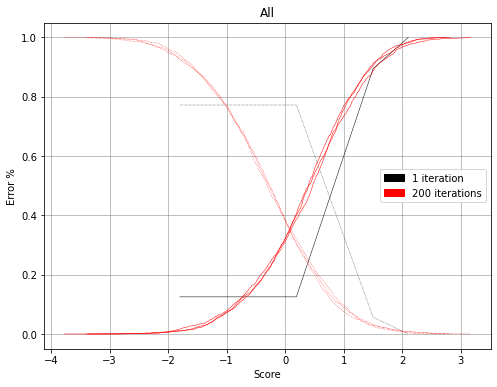

In [14]:
param['num_round']=1
log1=simple_bootstrap(Train,Test,param,ensemble_size=1)
param['num_round']=200
log10=simple_bootstrap(Train,Test,param,ensemble_size=3)

styled_logs=[
    {   'log':log1,
        'style':['k:','k-'],
        'label':'1 iteration',
        'label_color':'k'
    },
    {   'log':log10,
        'style':['r:','r-'],
        'label':'200 iterations',
        'label_color':'r'
    }
]
_mean,_std=plot_scores(styled_logs,title='All')

pickle_file=f'data/Checkpoint.pk'
Dump={'styled_logs':styled_logs,
     'tree':tree,
     'mean':_mean,
     'std':_std}
pkl.dump(Dump,open(pickle_file,'wb'))



In [ ]:
# Only for Urban Areas now
urban=True
area= 'Urban' if urban else 'Rural'
selector=df['urban']==urban
subData=D.get_subset(selector)
subD=DataSplitter(subData)

train_selector=np.random.rand(subData.shape[0]) > 0.7
Train=subD.get_subset(train_selector)
Test=subD.get_subset(~train_selector)

param['num_round']=10
log10=simple_bootstrap(Train,Test,param,ensemble_size=30)
param['num_round']=100
log100=simple_bootstrap(Train,Test,param,ensemble_size=30)

styled_logs=[
    {   'log':log10,
        'style':['g:','g-'],
        'label':'10 iterations',
        'label_color':'g'
    },
    {   'log':log100,
        'style':['b:','b-'],
        'label':'100 iterations',
        'label_color':'b'
    }
]

_mean,_std=plot_scores(styled_logs,title=f'{area}Only: Split into train and test at random')

pickle_file=f'data/Dump{area}.pk'
Dump={'styled_logs':styled_logs,
     'tree':tree,
     'mean':_mean,
     'std':_std}
pkl.dump(Dump,open(pickle_file,'wb'))



In [15]:
_mean, _std

(-0.22942667, 0.833041)

In [ ]:
urban=False
area= 'Urban' if urban else 'Rural'
selector=df['urban']==urban
subData=D.get_subset(selector)
subD=DataSplitter(subData)

train_selector=np.random.rand(subData.shape[0]) > 0.7
Train=subD.get_subset(train_selector)
Test=subD.get_subset(~train_selector)

param['num_round']=10
log10=simple_bootstrap(Train,Test,param,ensemble_size=30)
param['num_round']=100
log100=simple_bootstrap(Train,Test,param,ensemble_size=30)

styled_logs=[
    {   'log':log10,
        'style':['y:','y-'],
        'label':'10 iterations',
        'label_color':'y'
    },
    {   'log':log100,
        'style':['m:','m-'],
        'label':'100 iterations',
        'label_color':'m'
    }
]

_mean,_std=plot_scores(styled_logs,title=f'{area}Only: Split into train and test at random')

pickle_file=f'data/Dump{area}.pk'
Dump={'styled_logs':styled_logs,
     'tree':tree,
     'mean':_mean,
     'std':_std}
pkl.dump(Dump,open(pickle_file,'wb'))

